In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/data/train.csv', sep='\t')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/data/test.csv', sep = '\t')
dev_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/data/dev.csv', sep = '\t')

In [3]:
train_feature_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/data/train_feature_df.csv', sep='\t')
test_feature_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/data/test_feature_df.csv', sep = '\t')
dev_feature_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/data/dev_feature_df.csv', sep = '\t')
train_feature_df

,Unnamed: 0,user_id,label,last_day,rounds,num_days,max_level,1.0last_level,1.0last_trytimes,1.0max_retrytimes,1.0num_levels,1.0passrate_ratio,1.0retrytimes_ratio,1.0num_rounds,1.0total_duration,1.0num_help,1.0win_duration_ratio,2.0last_level,2.0last_trytimes,2.0max_retrytimes,2.0num_levels,2.0passrate_ratio,2.0retrytimes_ratio,2.0num_rounds,2.0total_duration,2.0num_help,2.0win_duration_ratio,2.0last_time,3.0last_level,3.0last_trytimes,3.0max_retrytimes,3.0num_levels,3.0passrate_ratio,3.0retrytimes_ratio,3.0num_rounds,3.0total_duration,3.0num_help,3.0win_duration_ratio,3.0last_time,4.0last_level,4.0last_trytimes,4.0max_retrytimes,4.0num_levels,4.0passrate_ratio,4.0retrytimes_ratio,4.0num_rounds,4.0total_duration,4.0num_help,4.0win_duration_ratio,4.0last_time
0,0,2774,0,4.0,215.0,4.0,134.0,116.0,1.0,3.0,56.0,1.004697,0.279470,73.0,8743.0,3.0,1.128784,116.0,12.0,7.0,20.0,1.125680,0.810917,46.0,5330.0,3.0,0.942069,1.0,123.0,1.0,10.0,37.0,1.126512,0.657605,65.0,7096.0,9.0,0.941808,1.0,134.0,5.0,5.0,15.0,0.894427,2.095213,31.0,4229.0,3.0,0.930846,1.0
1,1,2775,0,4.0,111.0,3.0,116.0,45.0,1.0,3.0,45.0,1.023738,0.204502,55.0,6773.0,8.0,1.232778,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,116.0,1.0,1.0,16.0,1.048408,0.300045,21.0,4276.0,3.0,1.642346,0.0,81.0,5.0,5.0,20.0,1.024516,0.769187,35.0,7790.0,3.0,2.250542,1.0
2,2,2776,1,3.0,69.0,3.0,123.0,123.0,1.0,4.0,40.0,1.097110,0.248792,49.0,4300.0,1.0,0.837336,68.0,9.0,9.0,4.0,0.768579,2.568146,13.0,1112.0,0.0,0.918683,1.0,70.0,3.0,3.0,3.0,0.403156,1.762801,7.0,707.0,0.0,0.916467,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,3,2777,0,4.0,286.0,4.0,164.0,116.0,1.0,5.0,66.0,0.991583,0.518244,93.0,11203.0,0.0,1.064818,141.0,1.0,4.0,55.0,0.896006,0.958794,96.0,14112.0,1.0,1.080538,1.0,153.0,1.0,7.0,19.0,1.063837,1.864522,48.0,8663.0,1.0,1.631832,1.0,164.0,12.0,12.0,14.0,0.738995,3.354036,49.0,6830.0,2.0,1.097669,1.0
4,4,2778,1,3.0,162.0,3.0,122.0,122.0,1.0,18.0,87.0,1.127967,0.507783,136.0,26400.0,9.0,1.445506,122.0,2.0,8.0,3.0,0.803819,3.137302,13.0,2806.0,0.0,1.389755,1.0,99.0,4.0,4.0,6.0,1.099679,1.367873,13.0,2839.0,0.0,1.868698,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,8153,10927,1,4.0,350.0,4.0,207.0,52.0,1.0,3.0,52.0,1.071706,0.158491,60.0,4278.0,0.0,0.761726,179.0,1.0,8.0,101.0,1.136235,2.217590,199.0,19627.0,5.0,0.725830,1.0,192.0,5.0,6.0,13.0,1.173134,1.851064,37.0,3485.0,2.0,0.718428,1.0,207.0,7.0,9.0,16.0,1.267583,3.122715,54.0,7307.0,3.0,1.164982,1.0
8154,8154,10928,1,2.0,50.0,2.0,48.0,38.0,1.0,0.0,38.0,1.084387,0.000000,40.0,3096.0,3.0,0.851944,48.0,1.0,0.0,10.0,1.249918,0.000000,10.0,977.0,0.0,0.905527,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
8155,8155,10929,0,4.0,243.0,3.0,122.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,116.0,1.0,5.0,71.0,0.900079,0.684813,114.0,13268.0,2.0,0.969805,0.0,122.0,1.0,9.0,32.0,0.754247,1.952475,90.0,10720.0,8.0,0.996916,1.0,113.0,4.0,5.0,15.0,0.782289,1.754519,39.0,4870.0,4.0,0.919773,1.0
8156,8156,10930,1,3.0,39.0,2.0,39.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,25.0,1.0,0.0,25.0,1.062608,0.000000,25.0,2702.0,2.0,1.303275,0.0,39.0,1.0,2.0,12.0,1.056998,0.166811,14.0,3418.0,4.0,2.556270,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [4]:
print(list(train_feature_df[:0]))

['Unnamed: 0', 'user_id', 'label', 'last_day', 'rounds', 'num_days', 'max_level', '1.0last_level', '1.0last_trytimes', '1.0max_retrytimes', '1.0num_levels', '1.0passrate_ratio', '1.0retrytimes_ratio', '1.0num_rounds', '1.0total_duration', '1.0num_help', '1.0win_duration_ratio', '2.0last_level', '2.0last_trytimes', '2.0max_retrytimes', '2.0num_levels', '2.0passrate_ratio', '2.0retrytimes_ratio', '2.0num_rounds', '2.0total_duration', '2.0num_help', '2.0win_duration_ratio', '2.0last_time', '3.0last_level', '3.0last_trytimes', '3.0max_retrytimes', '3.0num_levels', '3.0passrate_ratio', '3.0retrytimes_ratio', '3.0num_rounds', '3.0total_duration', '3.0num_help', '3.0win_duration_ratio', '3.0last_time', '4.0last_level', '4.0last_trytimes', '4.0max_retrytimes', '4.0num_levels', '4.0passrate_ratio', '4.0retrytimes_ratio', '4.0num_rounds', '4.0total_duration', '4.0num_help', '4.0win_duration_ratio', '4.0last_time']


In [5]:

# Day1_feature_names = ['1sep_time', '1num_succ', '1last_level', '1last_trytimes', '1max_retrytimes', '1num_levels', '1passrate_ratio', '1retrytimes_ratio', '1num_rounds', '1total_duration', '1num_help', '1win_duration_ratio',]
# Day2_feature_names = [ '2sep_time', '2num_succ', '2last_level', '2last_trytimes', '2max_retrytimes', '2num_levels', '2passrate_ratio', '2retrytimes_ratio', '2num_rounds', '2total_duration', '2num_help', '2win_duration_ratio', '2last_time']
# Day3_feature_names = [ '3sep_time', '3num_succ', '3last_level', '3last_trytimes', '3max_retrytimes', '3num_levels', '3passrate_ratio', '3retrytimes_ratio', '3num_rounds', '3total_duration', '3num_help', '3win_duration_ratio', '3last_time']
# Day4_feature_names = [ '4sep_time', '4num_succ', '4last_level', '4last_trytimes', '4max_retrytimes', '4num_levels', '4passrate_ratio', '4retrytimes_ratio', '4num_rounds', '4total_duration', '4num_help', '4win_duration_ratio', '4last_time']


In [7]:
Day1_feature_names = ['1.0last_level', '1.0last_trytimes', '1.0max_retrytimes', '1.0num_levels', '1.0passrate_ratio', '1.0retrytimes_ratio', '1.0num_rounds', '1.0total_duration', '1.0num_help', '1.0win_duration_ratio',]
Day2_feature_names = ['2.0last_level', '2.0last_trytimes', '2.0max_retrytimes', '2.0num_levels', '2.0passrate_ratio', '2.0retrytimes_ratio', '2.0num_rounds', '2.0total_duration', '2.0num_help', '2.0win_duration_ratio', '2.0last_time',]
Day3_feature_names = ['3.0last_level', '3.0last_trytimes', '3.0max_retrytimes', '3.0num_levels', '3.0passrate_ratio', '3.0retrytimes_ratio', '3.0num_rounds', '3.0total_duration', '3.0num_help', '3.0win_duration_ratio', '3.0last_time']
Day4_feature_names = [ '4.0last_level', '4.0last_trytimes', '4.0max_retrytimes', '4.0num_levels', '4.0passrate_ratio', '4.0retrytimes_ratio', '4.0num_rounds', '4.0total_duration', '4.0num_help', '4.0win_duration_ratio', '4.0last_time']


In [8]:
#构建训练集数据
Day1_X = np.hstack((train_feature_df[Day1_feature_names].values, np.zeros((8158, 1)))) #补上一列
Day2_X = train_feature_df[Day2_feature_names].values
Day3_X = train_feature_df[Day3_feature_names].values
Day4_X = train_feature_df[Day4_feature_names].values
X_train = np.array([Day1_X, Day2_X, Day3_X, Day4_X])
y_train = np.array(train_feature_df['label'])
Day1_X.shape, X_train.shape

((8158, 11), (4, 8158, 11))

In [9]:
#构建测试集数据
Day1_X_dev = np.hstack((dev_feature_df[Day1_feature_names].values, np.zeros((2658, 1)))) #补上一列
Day2_X_dev = dev_feature_df[Day2_feature_names].values
Day3_X_dev = dev_feature_df[Day3_feature_names].values
Day4_X_dev = dev_feature_df[Day4_feature_names].values
X_dev = np.array([Day1_X_dev, Day2_X_dev, Day3_X_dev, Day4_X_dev])
y_dev = np.array(dev_feature_df['label'])
Day1_X_dev.shape, X_dev.shape, y_dev.shape

((2658, 11), (4, 2658, 11), (2658,))

In [10]:
#构建测试集数据
Day1_X_test = np.hstack((test_feature_df[Day1_feature_names].values, np.zeros((2773, 1)))) #补上一列
Day2_X_test = test_feature_df[Day2_feature_names].values
Day3_X_test = test_feature_df[Day3_feature_names].values
Day4_X_test = test_feature_df[Day4_feature_names].values
X_test = np.array([Day1_X_test, Day2_X_test, Day3_X_test, Day4_X_test])
Day1_X_test.shape, X_test.shape

((2773, 11), (4, 2773, 11))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in range(4):
  X_train[i] = scaler.fit_transform(X_train[i])
  X_dev[i] = scaler.transform(X_dev[i])
  X_test[i] = scaler.transform(X_test[i])

In [12]:
X_train.shape[1]

8158

In [13]:
import math
def create_tensor(tensor):
  if USE_GPU:
    device = torch.device("cuda:0")
    tensor = tensor.to(device)
  return tensor 

def make_tensors(features, labels):
  seq_lengths = torch.LongTensor(features.size(0))
  seq_lengths = seq_lengths.long()
  labels = labels.long()
  return create_tensor(features), create_tensor(seq_lengths), create_tensor(labels)

def time_since(since):
  s = time.time() - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)

In [38]:
import torch
from torch.utils.data import DataLoader,Dataset

HIDDEN_SIZE = 64
BATCH_SIZE = 256
N_LAYER = 3
N_EPOCHS = 100
USE_GPU = True
N_CLASS = 2


class DayFeatureDataset(Dataset): #train and dev sets
  def __init__(self, is_train_set = True):
    self.X = X_train if is_train_set else X_dev
    self.X = torch.tensor(self.X).type(torch.float32)
    self.y = y_train if is_train_set else y_dev
    self.y = torch.LongTensor(self.y)
    # self.one_hot = torch.nn.functional.one_hot(self.y, 2)
    self.len = self.X.shape[1]
  
  def __getitem__(self, index):
    return self.X[:, index, :], self.y[index]
  
  def __len__(self):
    return self.len

class DayFeatureDataset_test(Dataset): #test
  def __init__(self):
    self.X = X_test
    self.X = torch.tensor(self.X).type(torch.float32)
    self.len = self.X.shape[1]
  
  def __getitem__(self, index):
    return self.X[:, index, :]
  
  def __len__(self):
    return self.len


In [39]:
trainset = DayFeatureDataset(is_train_set = True)
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
devset = DayFeatureDataset(is_train_set = False)
devloader = DataLoader(devset, batch_size = BATCH_SIZE, shuffle = False)
testset = DayFeatureDataset_test()
testloader = DataLoader(testset, batch_size = BATCH_SIZE, shuffle = False)

In [40]:
from sklearn.metrics import roc_auc_score
def proba1(output):
  output0 = output[:, 0].cpu()
  output1 = output[:, 1].cpu()
  proba1 = np.exp(output1) / (np.exp(output0) + np.exp(output1))
  return proba1

In [41]:
class RNNClassifier(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1, bidirectional= True):
    super(RNNClassifier, self).__init__()
    self.hidden_size = hidden_size
    self.n_layers = n_layers
    self.n_directions = 2 if bidirectional else 1
    self.gru = torch.nn.GRU(input_size, hidden_size, n_layers,
                            bidirectional=bidirectional)
    self.fc = torch.nn.Linear(hidden_size * self.n_directions, output_size)

  def _init_hidden(self, batch_size):
    hidden = torch.zeros(self.n_layers * self.n_directions,
                         batch_size, self.hidden_size)
    return create_tensor(hidden)

  def forward(self, input, seq_lengths):
    # input shape : B x S -> S x B
    input = input.transpose(0, 1)
    batch_size = input.shape[1]
    # print(batch_size)

    hidden = self._init_hidden(batch_size)

    output, hidden = self.gru(input, hidden)

    if self.n_directions == 2:
      hidden_cat = torch.cat([hidden[-1], hidden[-2]], dim=1)
    else:
      hidden_cat = hidden[-1]
    fc_output = self.fc(hidden_cat)
    return fc_output

def trainModel():
  total_loss = 0
  for i, (features, labels) in enumerate(trainloader, 1):
    inputs, seq_lengths, target = make_tensors(features, labels)
    output = classifier(inputs, seq_lengths)
    loss = criterion(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    if i % 10 == 0:
      print(f'[{time_since(start)}] Epoch {epoch} ', end='')
      print(f'[{i * len(inputs)}/{len(trainset)}] ', end='')
      print(f'loss={total_loss / (i * len(inputs))}')
  return total_loss

def devModel():
  correct = 0
  total = len(devset)
  print("evaluating trained model ...")
  with torch.no_grad():
    for i, (features, labels) in enumerate(devloader, 1):
      inputs, seq_lengths, target = make_tensors(features, labels)
      output = classifier(inputs, seq_lengths)
      pred = output.max(dim=1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()

  percent = '%.2f' % (100 * correct / total)
  print(f'Dev set: Accuracy {correct}/{total} {percent}%')

  return correct / total

def devModel_auc():
  correct = 0
  proba = []
  total = len(devset)
  print("evaluating trained model ...")
  with torch.no_grad():
    for i, (features, labels) in enumerate(devloader, 1):
      inputs, seq_lengths, target = make_tensors(features, labels)
      output = classifier(inputs, seq_lengths)
      pred = output.max(dim=1, keepdim=True)[1]
      proba_i = proba1(output)
      proba.append(proba_i)
      correct += pred.eq(target.view_as(pred)).sum().item()

  percent = '%.2f' % (100 * correct / total)
  print(f'Dev set: Accuracy {correct}/{total} {percent}%')

  probas = proba[0]
  for i in range(1, len(proba)):
    probas = torch.cat((probas, proba[i]))
  probas = np.array(probas).reshape(-1, 1)
  AUC = roc_auc_score(y_dev, probas)
  print("Dev set: AUC ", AUC )

  return correct / total, AUC

In [42]:
import time



if __name__ == '__main__':
  classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = True)
  if USE_GPU:
    device = torch.device("cuda:0")
    classifier.to(device)

  criterion = torch.nn.CrossEntropyLoss()

  optimizer = torch.optim.Adam(classifier.parameters(), lr=0.0005)

  start = time.time()
  print("Training for %d epochs..." % N_EPOCHS)
  acc_list = []
  auc_list = []
  for epoch in range(1, N_EPOCHS + 1):
    # Train cycle
    trainModel()
    acc, auc = devModel_auc()
    acc_list.append(acc)
    auc_list.append(auc)


Training for 100 epochs...
 0s] Epoch 1 [2560/8158] loss=0.0026024861726909876
 0s] Epoch 1 [5120/8158] loss=0.002514053462073207
 0s] Epoch 1 [7680/8158] loss=0.0024603173059100907
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dev set: AUC  0.7659875797270723
 0s] Epoch 2 [2560/8158] loss=0.002246245159767568
 0s] Epoch 2 [5120/8158] loss=0.002173806045902893
 0s] Epoch 2 [7680/8158] loss=0.0021304379721793034
evaluating trained model ...
Dev set: Accuracy 1917/2658 72.12%
Dev set: AUC  0.7704612025972533
 0s] Epoch 3 [2560/8158] loss=0.0020689645200036464
 0s] Epoch 3 [5120/8158] loss=0.00206280360580422
 0s] Epoch 3 [7680/8158] loss=0.002047382714226842
evaluating trained model ...
Dev set: Accuracy 1942/2658 73.06%
Dev set: AUC  0.7808998665240734
 1s] Epoch 4 [2560/8158] loss=0.0020311726024374367
 1s] Epoch 4 [5120/8158] loss=0.0020051392493769526
 1s] Epoch 4 [7680/8158] loss=0.0020151102178109187
evaluating trained model ...
Dev set: Accuracy 1981/2658 74.53%


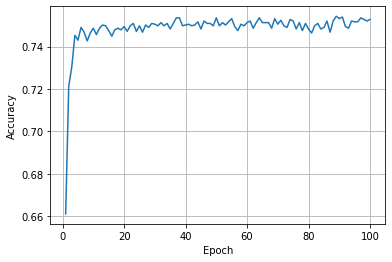

In [43]:
import matplotlib.pyplot as plt
import numpy as np
epoch = np.arange(1, len(acc_list) + 1, 1)
acc_list = np.array(acc_list)
plt.plot(epoch, acc_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

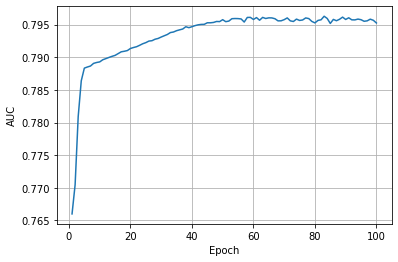

In [44]:
epoch = np.arange(1, len(acc_list) + 1, 1)
acc_list = np.array(auc_list)
plt.plot(epoch, auc_list)
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.grid()
plt.show()

In [21]:
def predModel(): #for devset
  correct = 0
  total = len(devset)
  proba = []
  print("evaluating trained model ...")
  with torch.no_grad():
    for i, (features, labels) in enumerate(devloader, 1):
      inputs, seq_lengths, target = make_tensors(features, labels)
      output = classifier(inputs, seq_lengths)
      pred = output.max(dim=1, keepdim=True)[1]
      proba_i = proba1(output)
      proba.append(proba_i)
      correct += pred.eq(target.view_as(pred)).sum().item()

    percent = '%.2f' % (100 * correct / total)
    print(f'Dev set: Accuracy {correct}/{total} {percent}%')

  return correct / total, proba

a, proba = predModel()
probas = proba[0]
for i in range(1, len(proba)):
  probas = torch.cat((probas, proba[i]))
probas = np.array(probas).reshape(-1, 1)
probas

evaluating trained model ...
Dev set: Accuracy 1997/2658 75.13%


array([[0.07022686],
       [0.31205487],
       [0.4768338 ],
       ...,
       [0.42758897],
       [0.72439045],
       [0.6430584 ]], dtype=float32)

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_dev, probas)

0.7964488960283805

In [75]:
def make_tensors2(features):
  seq_lengths = torch.LongTensor(features.size(0))
  seq_lengths = seq_lengths.long()
  return create_tensor(features), create_tensor(seq_lengths)

def testProba(loader_to_pred):
  proba = []
  print("making prediction ...")
  with torch.no_grad():
    for i, (features) in enumerate(loader_to_pred, 1):
      inputs, seq_lengths = make_tensors2(features)
      output = classifier(inputs, seq_lengths)
      pred = output.max(dim=1, keepdim=True)[1]
      proba_i = proba1(output)
      proba.append(proba_i)


  return proba

proba = testProba(testloader)
probas = proba[0]
for i in range(1, len(proba)):
  probas = torch.cat((probas, proba[i]))
probas = np.array(probas).reshape(-1)
probas

making prediction ...


array([0.03299821, 0.08941725, 0.6744743 , ..., 0.07172112, 0.40681252,
       0.38884482], dtype=float32)

In [76]:
probas.shape

(2773,)

In [77]:
probas.max()

0.99898624

In [78]:
output=pd.DataFrame({'user_id':test_df.user_id,'proba':probas})
output.to_csv('/content/drive/MyDrive/Colab Notebooks/xtzx/proj/result.csv', index=None) 

In [26]:
proba = testProba(testloader)
probas = proba[0]
for i in range(1, len(proba)):
  probas = torch.cat((probas, proba[i]))
probas = np.array(probas).reshape(-1)
test_feature_df['rnn'] = probas

def predProba(loader_to_pred):
  proba = []
  print("making prediction ...")
  with torch.no_grad():
    for i, (features, labels) in enumerate(loader_to_pred, 1):
      inputs, seq_lengths = make_tensors2(features)
      output = classifier(inputs, seq_lengths)
      pred = output.max(dim=1, keepdim=True)[1]
      proba_i = proba1(output)
      proba.append(proba_i)


  return proba

proba = predProba(trainloader)
probas = proba[0]
for i in range(1, len(proba)):
  probas = torch.cat((probas, proba[i]))
probas = np.array(probas).reshape(-1)
train_feature_df['rnn'] = probas

proba = predProba(devloader)
probas = proba[0]
for i in range(1, len(proba)):
  probas = torch.cat((probas, proba[i]))
probas = np.array(probas).reshape(-1)
dev_feature_df['rnn'] = probas


making prediction ...
making prediction ...
making prediction ...


In [30]:
feature_names = train_feature_df.columns[3:]
feature_names

Index(['last_day', 'rounds', 'num_days', 'max_level', '1.0last_level',
       '1.0last_trytimes', '1.0max_retrytimes', '1.0num_levels',
       '1.0passrate_ratio', '1.0retrytimes_ratio', '1.0num_rounds',
       '1.0total_duration', '1.0num_help', '1.0win_duration_ratio',
       '2.0last_level', '2.0last_trytimes', '2.0max_retrytimes',
       '2.0num_levels', '2.0passrate_ratio', '2.0retrytimes_ratio',
       '2.0num_rounds', '2.0total_duration', '2.0num_help',
       '2.0win_duration_ratio', '2.0last_time', '3.0last_level',
       '3.0last_trytimes', '3.0max_retrytimes', '3.0num_levels',
       '3.0passrate_ratio', '3.0retrytimes_ratio', '3.0num_rounds',
       '3.0total_duration', '3.0num_help', '3.0win_duration_ratio',
       '3.0last_time', '4.0last_level', '4.0last_trytimes',
       '4.0max_retrytimes', '4.0num_levels', '4.0passrate_ratio',
       '4.0retrytimes_ratio', '4.0num_rounds', '4.0total_duration',
       '4.0num_help', '4.0win_duration_ratio', '4.0last_time', 'rnn'],
    

In [35]:
#将训练集和验证集的特征提取出来，放到矩阵里
x_train = train_feature_df[feature_names].values
x_train = scaler.fit_transform(x_train)
y_train = train_feature_df['label']
x_dev = dev_feature_df[feature_names].values
x_dev = scaler.transform(x_dev)
y_dev = dev_feature_df['label']
x_test = test_feature_df[feature_names].values
x_test = scaler.transform(x_test)


In [36]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
                         metric = 'auc',
                         verbose = 0,
                         max_depth = 4,
                         learning_rate = 0.02,
                         num_leaves = 35,
                         feature_fraction=0.6,
                         bagging_fraction= 0.7,
                         bagging_freq= 6,
                         lambda_l1= 0,
                         lambda_l2= 38,
                         cat_smooth = 1,
                         class_weight = 'balanced',
                         )
gbm.fit(x_train, y_train)
proba = gbm.predict_proba(x_dev)[:, 1]
roc_auc_score(y_dev, proba)

0.8003817929487063

0.7990283988510837


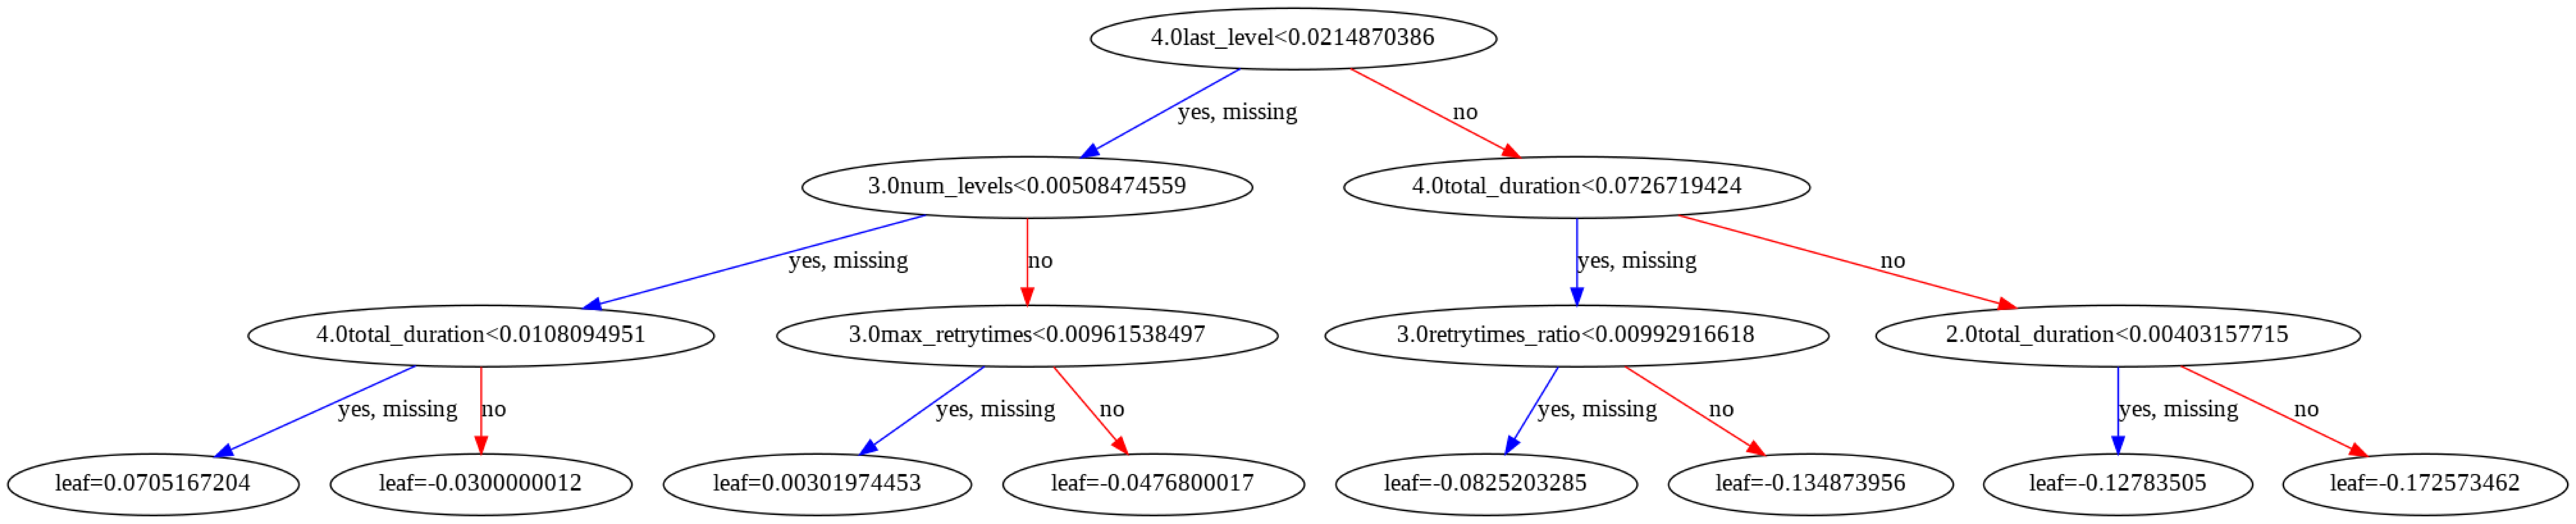

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 80,
      max_depth = 3,
      min_child_weight = 1,
      gamma = 0,
      subsample = 1,
      colsample_bytree = 1,
      reg_alpha = 0,
      reg_lambda = 1 ,
      learning_rate = 0.1,
      )
model.fit(x_train, y_train)
proba = model.predict_proba(x_dev)[:, 1]
print(roc_auc_score(y_dev, proba))

def create_feature_map(features):
    outfile = open('clf.fmap','w')
    for i,f in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i,f))
    outfile.close()
create_feature_map(feature_names)

import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_tree(model, num_trees=0, fmap='clf.fmap')
fig = plt.gcf()
fig.set_size_inches((240, 240))
# fig.savefig('tree.png')

In [ ]:
\

In [ ]:
#调参
HIDDEN_SIZEs = [64, 128, 192, 256, 384, 512]
N_EPOCHS  = 60
accs = []
aucs = []
for HIDDEN_SIZE in HIDDEN_SIZEs:
  
  if __name__ == '__main__':
    classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = False)
    if USE_GPU:
      device = torch.device("cuda:0")
      classifier.to(device)

    criterion = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.0005)

    start = time.time()
    print("Training for %d epochs..." % N_EPOCHS)
    acc_list = []
    auc_list = []
    for epoch in range(1, N_EPOCHS + 1):
      # Train cycle
      trainModel()
      acc, auc = devModel_auc()
      acc_list.append(acc)
      auc_list.append(auc)
    accs.append(acc_list)
    aucs.append(auc_list)


Training for 60 epochs...
 0s] Epoch 1 [2560/8158] loss=0.0025588596239686013
 0s] Epoch 1 [5120/8158] loss=0.002515297138597816
 0s] Epoch 1 [7680/8158] loss=0.002488892145144443
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dec set: AUC  0.7637352919067348
 0s] Epoch 2 [2560/8158] loss=0.002358920522965491
 0s] Epoch 2 [5120/8158] loss=0.0023558591376058756
 0s] Epoch 2 [7680/8158] loss=0.0023325604231407243
evaluating trained model ...
Dev set: Accuracy 1758/2658 66.14%
Dec set: AUC  0.7650602599906383
 0s] Epoch 3 [2560/8158] loss=0.0021973100258037446
 0s] Epoch 3 [5120/8158] loss=0.002181825810112059
 0s] Epoch 3 [7680/8158] loss=0.0021527899118761224
evaluating trained model ...
Dev set: Accuracy 1957/2658 73.63%
Dec set: AUC  0.7662206730395684
 0s] Epoch 4 [2560/8158] loss=0.002105749025940895
 0s] Epoch 4 [5120/8158] loss=0.002061964152380824
 0s] Epoch 4 [7680/8158] loss=0.0020523226819932463
evaluating trained model ...
Dev set: Accuracy 1938/2658 72.91%
D

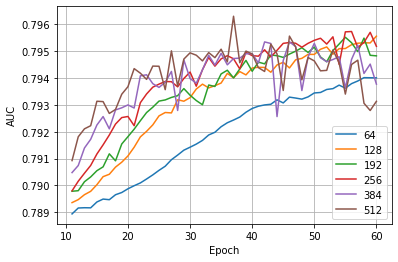

In [ ]:

for i, HIDDEN_SIZE in enumerate(HIDDEN_SIZEs):

  epoch = np.arange(1, len(acc_list) + 1, 1)
  plt.plot(epoch[10:], aucs[i][10:], label = str(HIDDEN_SIZE))

plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#调参N_LAYER
N_EPOCHS  = 60
HIDDEN_SIZE = 128

N_LAYERs = [1, 2, 3, 4, 5] 

accs = []
aucs = []
for N_LAYER in N_LAYERs:
  
  if __name__ == '__main__':
    classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = False)
    if USE_GPU:
      device = torch.device("cuda:0")
      classifier.to(device)

    criterion = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.0005)

    start = time.time()
    print("Training for %d epochs..." % N_EPOCHS)
    acc_list = []
    auc_list = []
    for epoch in range(1, N_EPOCHS + 1):
      # Train cycle
      trainModel()
      acc, auc = devModel_auc()
      acc_list.append(acc)
      auc_list.append(auc)
    accs.append(acc_list)
    aucs.append(auc_list)



Training for 60 epochs...
 0s] Epoch 1 [2560/8158] loss=0.0026507659815251826
 0s] Epoch 1 [5120/8158] loss=0.002572451124433428
 0s] Epoch 1 [7680/8158] loss=0.0025082085048779845
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dec set: AUC  0.7691760309325565
 0s] Epoch 2 [2560/8158] loss=0.002344636060297489
 0s] Epoch 2 [5120/8158] loss=0.0023166336468420923
 0s] Epoch 2 [7680/8158] loss=0.0022999994611988465
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dec set: AUC  0.7695237758337192
 0s] Epoch 3 [2560/8158] loss=0.00218875827267766
 0s] Epoch 3 [5120/8158] loss=0.0021827931399457158
 0s] Epoch 3 [7680/8158] loss=0.0021727691947792966
evaluating trained model ...
Dev set: Accuracy 1941/2658 73.02%
Dec set: AUC  0.7688832429912504
 0s] Epoch 4 [2560/8158] loss=0.0020719136111438273
 0s] Epoch 4 [5120/8158] loss=0.0020901946700178087
 0s] Epoch 4 [7680/8158] loss=0.0020751331622401873
evaluating trained model ...
Dev set: Accuracy 1957/2658 73.63%

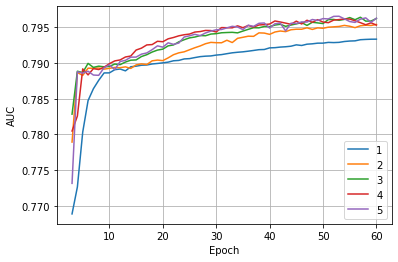

In [ ]:
for i, N_LAYER in enumerate(N_LAYERs):

  epoch = np.arange(1, len(acc_list) + 1, 1)
  plt.plot(epoch[2:], aucs[i][2:], label = str(N_LAYER))

plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#调参BATCH_SIZEs
N_EPOCHS  = 60
HIDDEN_SIZE = 128
N_LAYER = 3

BATCH_SIZEs = [64, 128, 256, 512, 1024, 2048]


accs = []
aucs = []

for BATCH_SIZE in BATCH_SIZEs:
  trainset = DayFeatureDataset(is_train_set = True)
  trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
  devset = DayFeatureDataset(is_train_set = False)
  devloader = DataLoader(devset, batch_size = BATCH_SIZE, shuffle = False)
  
  if __name__ == '__main__':
    classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = False)
    if USE_GPU:
      device = torch.device("cuda:0")
      classifier.to(device)

    criterion = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.0005)

    start = time.time()
    print("Training for %d epochs..." % N_EPOCHS)
    acc_list = []
    auc_list = []
    for epoch in range(1, N_EPOCHS + 1):
      # Train cycle
      trainModel()
      acc, auc = devModel_auc()
      acc_list.append(acc)
      auc_list.append(auc)
    accs.append(acc_list)
    aucs.append(auc_list)


Training for 60 epochs...
 0s] Epoch 1 [640/8158] loss=0.009990967344492674
 0s] Epoch 1 [1280/8158] loss=0.00996819008141756
 0s] Epoch 1 [1920/8158] loss=0.00988262997319301
 0s] Epoch 1 [2560/8158] loss=0.009775035362690688
 0s] Epoch 1 [3200/8158] loss=0.00966526048257947
 0s] Epoch 1 [3840/8158] loss=0.009473436900104085
 0s] Epoch 1 [4480/8158] loss=0.00929659732750484
 0s] Epoch 1 [5120/8158] loss=0.009118783136364073
 0s] Epoch 1 [5760/8158] loss=0.009065242929177151
 0s] Epoch 1 [6400/8158] loss=0.00900147550739348
 0s] Epoch 1 [7040/8158] loss=0.008929627359082754
 0s] Epoch 1 [7680/8158] loss=0.00889941987503941
evaluating trained model ...
Dev set: Accuracy 1971/2658 74.15%
Dec set: AUC  0.7873127752190856
 0s] Epoch 2 [640/8158] loss=0.008154264604672789
 0s] Epoch 2 [1280/8158] loss=0.008099221554584802
 0s] Epoch 2 [1920/8158] loss=0.00814382426130275
 0s] Epoch 2 [2560/8158] loss=0.008190648804884404
 0s] Epoch 2 [3200/8158] loss=0.008178096134215593
 0s] Epoch 2 [3840/

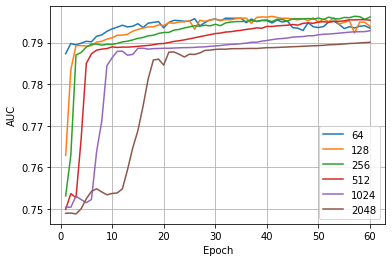

In [ ]:
for i, BATCH_SIZE in enumerate(BATCH_SIZEs):

  epoch = np.arange(1, len(acc_list) + 1, 1)
  plt.plot(epoch, aucs[i], label = str(BATCH_SIZE))

plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

In [46]:
#调参 learning rate
N_EPOCHS  = 60
HIDDEN_SIZE = 128
N_LAYER = 3
BATCH_SIZE = 256


LRs = [0.00005, 0.0001, 0.0005, 0.001, 0.01, 0.1]
accs = []
aucs = []

for LR in LRs:
  trainset = DayFeatureDataset(is_train_set = True)
  trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
  devset = DayFeatureDataset(is_train_set = False)
  devloader = DataLoader(devset, batch_size = BATCH_SIZE, shuffle = False)
  
  if __name__ == '__main__':
    classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = False)
    if USE_GPU:
      device = torch.device("cuda:0")
      classifier.to(device)

    criterion = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(classifier.parameters(), lr=LR)

    start = time.time()
    print("Training for %d epochs..." % N_EPOCHS)
    acc_list = []
    auc_list = []
    for epoch in range(1, N_EPOCHS + 1):
      # Train cycle
      trainModel()
      acc, auc = devModel_auc()
      acc_list.append(acc)
      auc_list.append(auc)
    accs.append(acc_list)
    aucs.append(auc_list)


Training for 60 epochs...
 0s] Epoch 1 [2560/8158] loss=0.0026864829706028104
 0s] Epoch 1 [5120/8158] loss=0.002666939632035792
 0s] Epoch 1 [7680/8158] loss=0.0026475111721083523
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dev set: AUC  0.7534390738931067
 0s] Epoch 2 [2560/8158] loss=0.002588431490585208
 0s] Epoch 2 [5120/8158] loss=0.0025673875119537116
 0s] Epoch 2 [7680/8158] loss=0.002542268120062848
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dev set: AUC  0.7522170711477857
 0s] Epoch 3 [2560/8158] loss=0.0025100577622652054
 0s] Epoch 3 [5120/8158] loss=0.0024886950268410146
 0s] Epoch 3 [7680/8158] loss=0.0024770861258730293
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%
Dev set: AUC  0.7502897874176356
 0s] Epoch 4 [2560/8158] loss=0.002439174056053162
 0s] Epoch 4 [5120/8158] loss=0.002453998092096299
 0s] Epoch 4 [7680/8158] loss=0.0024557991263767084
evaluating trained model ...
Dev set: Accuracy 1757/2658 66.10%


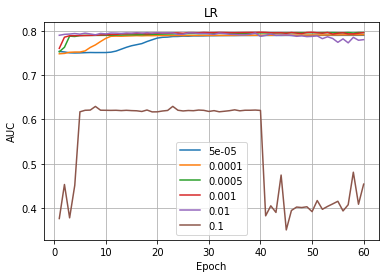

In [52]:
for i, LR in enumerate(LRs):

  epoch = np.arange(1, len(acc_list) + 1, 1)
  plt.plot(epoch, aucs[i], label = str(LR))
  
plt.title('LR')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

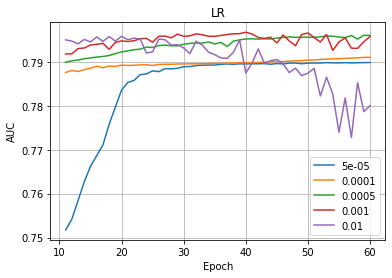

In [53]:
for i, LR in enumerate(LRs[:-1]):

  epoch = np.arange(1, len(acc_list) + 1, 1)
  plt.plot(epoch[10:60], aucs[i][10:60], label = str(LR))

plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('LR')
plt.legend()
plt.grid()
plt.show()

In [71]:
#调参 learning rate

HIDDEN_SIZE = 128
N_LAYER = 3
BATCH_SIZE = 256

N_EPOCHS1  = 10
LR1 = 0.001
N_EPOCHS2  = 500
LR2 = 0.0001


trainset = DayFeatureDataset(is_train_set = True)
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
devset = DayFeatureDataset(is_train_set = False)
devloader = DataLoader(devset, batch_size = BATCH_SIZE, shuffle = False)

if __name__ == '__main__':
  classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = False)
  if USE_GPU:
    device = torch.device("cuda:0")
    classifier.to(device)

  criterion = torch.nn.CrossEntropyLoss()

  optimizer = torch.optim.Adam(classifier.parameters(), lr=LR1)

  start = time.time()
  print("Training for %d epochs..." % N_EPOCHS1 )
  acc_list = []
  auc_list = []
  for epoch in range(1, N_EPOCHS1  + 1):
    # Train cycle
    trainModel()
    acc, auc = devModel_auc()
    acc_list.append(acc)
    auc_list.append(auc)

  optimizer = torch.optim.Adam(classifier.parameters(), lr=LR2)

  start = time.time()
  print("Training for another %d epochs..." % N_EPOCHS2 )
  for epoch in range(N_EPOCHS1, N_EPOCHS2  + N_EPOCHS1):
    # Train cycle
    trainModel()
    acc, auc = devModel_auc()
    acc_list.append(acc)
    auc_list.append(auc)
  accs.append(acc_list)
  aucs.append(auc_list)


Training for 10 epochs...
 0s] Epoch 1 [2560/8158] loss=0.002543340320698917
 0s] Epoch 1 [5120/8158] loss=0.002475746313575655
 0s] Epoch 1 [7680/8158] loss=0.0023982268447677296
evaluating trained model ...
Dev set: Accuracy 1923/2658 72.35%
Dev set: AUC  0.7615272223299603
 0s] Epoch 2 [2560/8158] loss=0.0020847768289968373
 0s] Epoch 2 [5120/8158] loss=0.00205995308351703
 0s] Epoch 2 [7680/8158] loss=0.0020572996698319914
evaluating trained model ...
Dev set: Accuracy 1963/2658 73.85%
Dev set: AUC  0.7884536059030093
 0s] Epoch 3 [2560/8158] loss=0.0020389616140164433
 0s] Epoch 3 [5120/8158] loss=0.002017208148026839
 0s] Epoch 3 [7680/8158] loss=0.002016541330764691
evaluating trained model ...
Dev set: Accuracy 1987/2658 74.76%
Dev set: AUC  0.7893025961794176
 0s] Epoch 4 [2560/8158] loss=0.002022141800262034
 0s] Epoch 4 [5120/8158] loss=0.002041573345195502
 0s] Epoch 4 [7680/8158] loss=0.002013451466336846
evaluating trained model ...
Dev set: Accuracy 1962/2658 73.81%
Dev 

KeyboardInterrupt: ignored

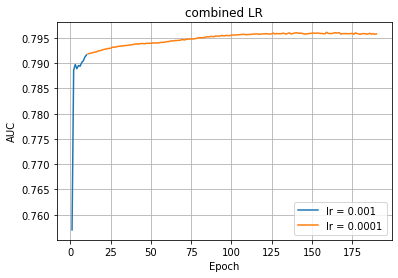

In [74]:
epoch = np.arange(1, len(auc_list) + 1, 1)
plt.plot(epoch[:10], auc_list[:10], label = 'lr = 0.001')
plt.plot(epoch[10:], auc_list[10:], label = 'lr = 0.0001')
 
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('combined LR')
plt.legend()
plt.grid()
plt.show()

In [73]:
#调参 learning rate

HIDDEN_SIZE = 128
N_LAYER = 3
BATCH_SIZE = 256

N_EPOCHS1  = 10
LR1 = 0.001
N_EPOCHS2  = 180
LR2 = 0.0001


trainset = DayFeatureDataset(is_train_set = True)
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
devset = DayFeatureDataset(is_train_set = False)
devloader = DataLoader(devset, batch_size = BATCH_SIZE, shuffle = False)

if __name__ == '__main__':
  classifier = RNNClassifier(11, HIDDEN_SIZE, N_CLASS, N_LAYER, bidirectional = False)
  if USE_GPU:
    device = torch.device("cuda:0")
    classifier.to(device)

  criterion = torch.nn.CrossEntropyLoss()

  optimizer = torch.optim.Adam(classifier.parameters(), lr=LR1)

  start = time.time()
  print("Training for %d epochs..." % N_EPOCHS1 )
  acc_list = []
  auc_list = []
  for epoch in range(1, N_EPOCHS1  + 1):
    # Train cycle
    trainModel()
    acc, auc = devModel_auc()
    acc_list.append(acc)
    auc_list.append(auc)

  optimizer = torch.optim.Adam(classifier.parameters(), lr=LR2)

  start = time.time()
  print("Training for another %d epochs..." % N_EPOCHS2 )
  for epoch in range(N_EPOCHS1, N_EPOCHS2  + N_EPOCHS1):
    # Train cycle
    trainModel()
    acc, auc = devModel_auc()
    acc_list.append(acc)
    auc_list.append(auc)
  accs.append(acc_list)
  aucs.append(auc_list)

Training for 10 epochs...
 0s] Epoch 1 [2560/8158] loss=0.002543482487089932
 0s] Epoch 1 [5120/8158] loss=0.0024882721481844783
 0s] Epoch 1 [7680/8158] loss=0.0024206011944139997
evaluating trained model ...
Dev set: Accuracy 1906/2658 71.71%
Dev set: AUC  0.7569853770268538
 0s] Epoch 2 [2560/8158] loss=0.0021305083530023692
 0s] Epoch 2 [5120/8158] loss=0.00208756648353301
 0s] Epoch 2 [7680/8158] loss=0.0020813211915083228
evaluating trained model ...
Dev set: Accuracy 1946/2658 73.21%
Dev set: AUC  0.7886260570529046
 0s] Epoch 3 [2560/8158] loss=0.0020043008727952836
 0s] Epoch 3 [5120/8158] loss=0.0020054576569236817
 0s] Epoch 3 [7680/8158] loss=0.0020112494899270435
evaluating trained model ...
Dev set: Accuracy 1963/2658 73.85%
Dev set: AUC  0.7897359349663341
 0s] Epoch 4 [2560/8158] loss=0.0019758402951993046
 0s] Epoch 4 [5120/8158] loss=0.001987737836316228
 0s] Epoch 4 [7680/8158] loss=0.002003126731142402
evaluating trained model ...
Dev set: Accuracy 1991/2658 74.91%
